In [1]:
import matplotlib.pyplot as plt

from estimate import *
from save import*

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = 11

In [2]:
# -------- Lorenz parameters ---------
SIGMA = 10
RHO = 28
BETA = 8/3
# --------- AOT parameters -----------
sigma = SIGMA + 100
rho = RHO + 100
beta = BETA
mu1 = 1000
mu2 = 1000
mu3 = 0
# ------ simulation parameters -------
dt = 1e-3
T  = 20
Tr = 1
# ------- simulation options ---------
save_folder          = 'data/'
SAVE                 = False
PRINT_SAVE           = False
CHECK_IF_SAVE_EXISTS = False

lorenz_params = [SIGMA, RHO, BETA]
aot_params = [sigma, rho, beta]
mu_params = [mu1, mu2, mu3]

start = time.time()
t, G, XU, XUt = estimate(lorenz_params, aot_params, 
                         mu_params, dt, T, Tr)
if SAVE:
    save(L=lorenz_params, A=aot_params, M=mu_params,
         XU=XU, XUt=XUt, G=G, Tr=Tr, dt=dt,
         folder=save_folder, PRINT_SAVE=PRINT_SAVE, 
         CHECK_IF_SAVE_EXISTS=CHECK_IF_SAVE_EXISTS)

final_err = abs(lorenz_params - G[:,-1])
print('Runtime: {:.4f} seconds'.format(time.time()-start),
      '\nSigma error: {:.4e}'.format(final_err[0]),
      '\nRho error: {:.4e}'.format(final_err[1]),
      '\nBeta error: {:.4e}'.format(final_err[2]))

Runtime: 1.9156 seconds 
Sigma error: 2.7107e-12 
Rho error: 6.0751e-13 
Beta error: 0.0000e+00


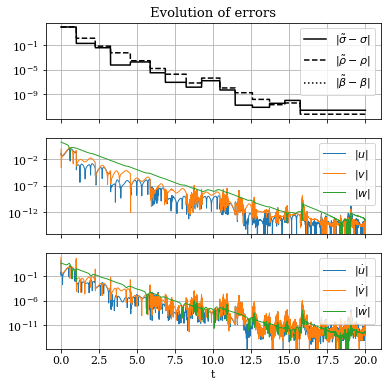

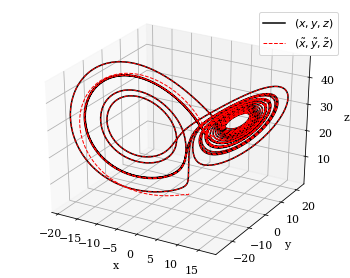

In [5]:
uerr, verr, werr = abs(XU[:3] - XU[3:])
uterr, vterr, wterr = abs(XUt[:3] - XUt[3:])
sigma_err, rho_err, beta_err = abs(G.T - [SIGMA, RHO, BETA]).T

# ======================== plot errors =========================
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(6,6), 
                                    sharex=True, sharey=False)

ax1.plot(t, sigma_err, 'k', label=r'$|\tilde{\sigma}-\sigma|$')
ax1.plot(t, rho_err, 'k--', label=r'$|\tilde{\rho}-\rho|$')
ax1.plot(t, beta_err, 'k:', label=r'$|\tilde{\beta}-\beta|$')
ax1.set_yscale('log'); ax1.grid(); ax1.legend()
ax1.set_title('Evolution of errors')

ax2.plot(t, uerr, lw=1, label=r'$|u|$')
ax2.plot(t, verr, lw=1, label=r'$|v|$')
ax2.plot(t, werr, lw=1, label=r'$|w|$')
ax2.set_yscale('log'); ax2.grid(); ax2.legend()

ax3.plot(t, uterr, lw=1, label=r'$|\dot{u}|$')
ax3.plot(t, vterr, lw=1, label=r'$|\dot{v}|$')
ax3.plot(t, wterr, lw=1, label=r'$|\dot{w}|$')
ax3.set_yscale('log'); ax3.grid(); ax3.legend()
ax3.set_xlabel('t')
plt.show()

# ====== plot solution to coupled Lorenz + AOT system =========
plt.figure(figsize=(5,4))
x, y, z, u, v, w = XU

ax = plt.axes(projection='3d')
ax.plot(x, y, z, 'k', label=r'$(x,y,z)$')
ax.plot(u, v, w, 'r--', lw=1, label=r'$(\tilde{x},\tilde{y},\tilde{z})$')
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z')
plt.tight_layout()
plt.legend()
plt.show()